In [1]:
import re
import datetime
import time
import pandas as pd
import matplotlib as plt
import japanize_matplotlib #日本語化matplotlib
import seaborn as sns
sns.set(font="IPAexGothic") #日本語フォント設定
import numpy as np
import matplotlib.pyplot as plt
import lightgbm as lgb
from sklearn.model_selection import *

In [2]:
import pickle

# カレントディレクトリにあるモデルデータの読み込み
gbm = pickle.load(open('アジ_lgbm.pkl', 'rb'))

In [ ]:
#!brew install graphviz


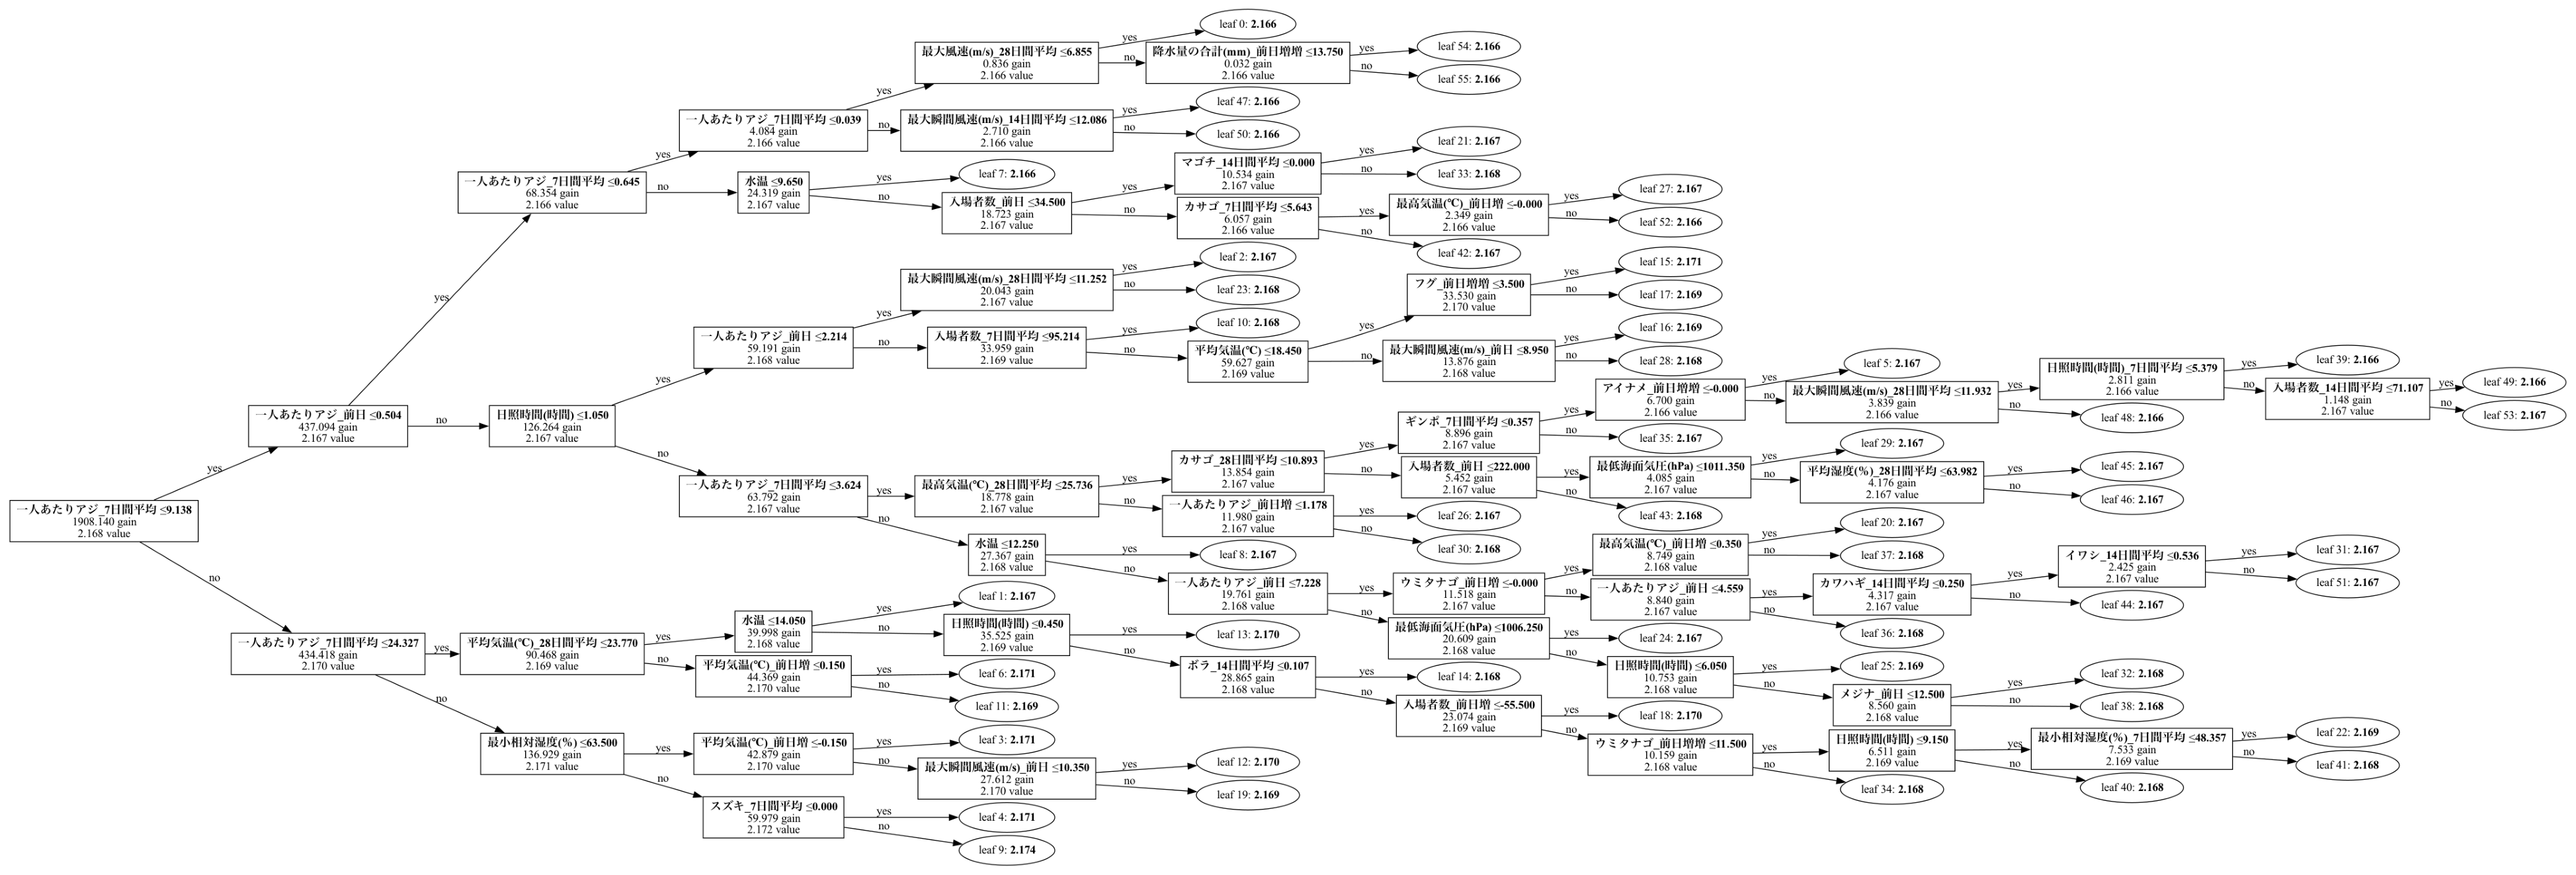

In [6]:
from graphviz import Digraph
dg = Digraph()
dg.attr('node', fontname="IPAGothic")

ax = lgb.plot_tree(gbm, tree_index=0, figsize=(50, 50), show_info=['split_gain', 'internal_value'])
plt.show()

In [7]:
df1 = pd.read_csv("アジ_df.csv")

In [8]:
df1

年月日  平均気温(℃)  降水量の合計(mm)  日照時間(時間)  最高気温(℃)  最低気温(℃)  \
0     2018-01-02      7.6         0.0       9.2     12.3      4.8   
1     2018-01-03      5.7         0.0       9.6      9.6      3.1   
2     2018-01-04      5.7         0.0       8.7     10.1      2.4   
3     2018-01-05      4.4         0.0       0.0      6.4      2.8   
4     2018-01-06      5.8         0.0       8.7     10.4      0.4   
...          ...      ...         ...       ...      ...      ...   
2047  2023-08-11     29.5         0.0       8.3     33.7     26.2   
2048  2023-08-12     29.9         0.0       9.9     35.1     26.8   
2049  2023-08-13     28.1        10.0       1.1     32.8     26.5   
2050  2023-08-14     28.7        24.5       6.3     33.1     26.1   
2051  2023-08-15     28.5         8.5       3.4     31.6     26.4   

      合計全天日射量(MJ/㎡)  平均風速(m/s)  最大風速(m/s)  最大瞬間風速(m/s)  ...  ウナギ_前日増増  \
0               0.0        3.4        6.7         12.0  ...       NaN   
1               0.0        5.5        9.6         17.7  ...       NaN   
2               0.0        3.6        5.9          9.9  ...       NaN   
3               0.0        2.7        6.2         10.3  ...       0.0   
4               0.0        2.3        6.5          9.5  ...       0.0   
...             ...        ...        ...          ...  ...       ...   
2047            0.0        3.4        8.5         13.0  ...       0.0   
2048            0.0        2.5        5.4          8.5  ...       0.0   
2049            0.0        2.9        5.5         10.0  ...       0.0   
2050            0.0        3.3        6.0         11.2  ...       0.0   
2051            0.0        4.8        7.7         12.4  ...       0.0   

      ウナギ_7日間平均  ウナギ_14日間平均  ウナギ_28日間平均  一人あたりアジ_前日  一人あたりアジ_前日増  \
0           NaN         NaN         NaN         NaN          NaN   
1           NaN         NaN         NaN    0.218978          NaN   
2           NaN         NaN         NaN    1.721854     1.502876   
3           NaN         NaN         NaN    0.245399    -1.476456   
4           NaN         NaN         NaN    0.000000    -0.245399   
...         ...         ...         ...         ...          ...   
2047   0.142857    0.071429    0.035714   10.795455   -14.204545   
2048   0.000000    0.071429    0.035714    4.926829    -5.868625   
2049   0.000000    0.071429    0.035714    6.091954     1.165125   
2050   0.000000    0.071429    0.035714   11.287129     5.195175   
2051   0.000000    0.071429    0.035714   10.000000    -1.287129   

      一人あたりアジ_前日増増  一人あたりアジ_7日間平均  一人あたりアジ_14日間平均  一人あたりアジ_28日間平均  
0              NaN            NaN             NaN             NaN  
1              NaN            NaN             NaN             NaN  
2              NaN            NaN             NaN             NaN  
3        -2.979332            NaN             NaN             NaN  
4         1.231057            NaN             NaN             NaN  
...            ...            ...             ...             ...  
2047    -27.439840      11.187230        8.873116       11.012236  
2048      8.335920      10.720102        8.911179       10.680675  
2049      7.033750      11.005347        8.863693       10.676292  
2050      4.030050      11.271190        9.053311       10.981602  
2051     -6.482303      11.409439        9.277401       10.870318  

[2052 rows x 838 columns]

In [9]:
aji = gbm.dump_model()

In [10]:
len(aji)

14

In [11]:
aji.keys()

dict_keys(['name', 'version', 'num_class', 'num_tree_per_iteration', 'label_index', 'max_feature_idx', 'objective', 'average_output', 'feature_names', 'monotone_constraints', 'feature_infos', 'tree_info', 'feature_importances', 'pandas_categorical'])

In [12]:
aji["objective"]

'regression sqrt'

In [13]:
aji["tree_info"][0]

{'tree_index': 0,
 'num_leaves': 56,
 'num_cat': 0,
 'shrinkage': 1,
 'tree_structure': {'split_index': 0,
  'split_feature': 833,
  'split_gain': 1908.1400146484375,
  'threshold': 9.137693859291128,
  'decision_type': '<=',
  'default_left': True,
  'missing_type': 'NaN',
  'internal_value': 2.16769,
  'internal_weight': 0,
  'internal_count': 1509,
  'left_child': {'split_index': 1,
   'split_feature': 830,
   'split_gain': 437.093994140625,
   'threshold': 0.5042372881355933,
   'decision_type': '<=',
   'default_left': True,
   'missing_type': 'NaN',
   'internal_value': 2.16701,
   'internal_weight': 1104,
   'internal_count': 1104,
   'left_child': {'split_index': 6,
    'split_feature': 833,
    'split_gain': 68.35440063476562,
    'threshold': 0.6449206136219156,
    'decision_type': '<=',
    'default_left': True,
    'missing_type': 'NaN',
    'internal_value': 2.16607,
    'internal_weight': 341,
    'internal_count': 341,
    'left_child': {'split_index': 46,
     'split_f

In [ ]:
aji["tree_info"][2]["tree_structure"]["left_child"]["left_child"]["left_child"]

{'decision_type': '<=',
 'default_left': True,
 'internal_count': 146,
 'internal_value': -7.00748,
 'left_child': {'decision_type': '<=',
  'default_left': True,
  'internal_count': 119,
  'internal_value': -7.29206,
  'left_child': {'leaf_count': 20,
   'leaf_index': 0,
   'leaf_value': -0.006869658660888673},
  'missing_type': 'NaN',
  'right_child': {'decision_type': '<=',
   'default_left': True,
   'internal_count': 99,
   'internal_value': -7.3774,
   'left_child': {'leaf_count': 79,
    'leaf_index': 38,
    'leaf_value': -0.007377346992492676},
   'missing_type': 'NaN',
   'right_child': {'leaf_count': 20,
    'leaf_index': 39,
    'leaf_value': -0.0073776011466979985},
   'split_feature': 51,
   'split_gain': 1.0308999662811402e-06,
   'split_index': 38,
   'threshold': 22.500000000000004},
  'split_feature': 54,
  'split_gain': 4.289440155029297,
  'split_index': 37,
  'threshold': -8.499999999999998},
 'missing_type': 'NaN',
 'right_child': {'leaf_count': 27,
  'leaf_index'

In [14]:
aji["average_output"]

False

In [15]:
aji["tree_info"][0]["tree_structure"].keys()

dict_keys(['split_index', 'split_feature', 'split_gain', 'threshold', 'decision_type', 'default_left', 'missing_type', 'internal_value', 'internal_weight', 'internal_count', 'left_child', 'right_child'])

In [16]:
aji["tree_info"][0]["tree_index"]

0

In [17]:
model = aji
import copy
# 葉であれば value を返し、分岐であれば条件を追加し接続して葉まで辿る
# 葉に至るまで条件は　AND
# 最後の葉で function を add する
def parse_child(tree, query_param, conditions, result):
  if "split_index" in tree.keys():
    # 枝の場合
    # この分岐で検査される属性
    feature = model["feature_names"][tree["split_feature"]]
    # この分岐で検査される属性がクエリに入っているかどうか
    if feature in query_param.keys():
      # 比較を実施する
      # 比較オペレータが"<="の場合
      if tree["decision_type"] == "<=":
        if query_param[feature] <= tree["threshold"]:
          # left_child だけが生き残る
          parse_child(tree["left_child"], query_param, copy.copy(conditions), result)
        else:
          # right_child だけが生き残る
          parse_child(tree["right_child"], query_param, copy.copy(conditions), result)
      else:
        # "<=" 以外の decision type はエラーにする
        raise ValueError("Unsupported decision type: " + tree["decision_type"])
    else:
    # この分岐で検査される属性がクエリに入っていないとき
    # この分岐の条件を文字列化する
      if tree["decision_type"] == "<=":
        # 左側 true
        true_condtion = copy.copy(conditions)
        true_condtion.append({"feature_name": feature, "operator" : "<=" ,  "threshold": tree["threshold"]})
        parse_child(tree["left_child"], query_param, true_condtion, result)
        # 右側 false
        false_condition = copy.copy(conditions)
        false_condition.append({"feature_name": feature, "operator" : ">" ,  "threshold": tree["threshold"]})
        parse_child(tree["right_child"], query_param, false_condition, result)
      else:
        # "<=" 以外の decision type はエラーにする
        raise ValueError("Unsupported decision type: " + tree["decision_type"])
  else:
    # 葉の場合
    if abs(tree["leaf_value"]) > 0.001:
      result.append({"conditions": conditions, "leaf_value": tree["leaf_value"]})

# res = [resullt, result,...]
# result = {"condtions": [{"feature_name": feature1, "operator": "<=",  "threshold": val1}, ...], "leaf_value": leaf_value1}
# query_param = {"feature_name1": value1, "feature_name1": value2,...}
def functions(query_param):
  res = []
  for tree_info in model["tree_info"]:
    result = []
    conditions = []
    parse_child(tree_info["tree_structure"], query_param, conditions, result)
    if len(result) > 0:
      res.append(result)
  return res

In [19]:
# ある一日のデータを使って predict する
query_df = df1[df1["年月日"] == "2021-07-04"]
y_pred = gbm.predict(query_df.drop(["年月日", "一人あたりアジ"], axis=1), num_iteration=gbm.best_iteration)
# 予測値
print(y_pred)
query_param = query_df.to_dict(orient='records')[0]
# 正解データ
print(query_param["一人あたりアジ"])
del query_param["年月日"], query_param["一人あたりアジ"]

[14.35464309]
23.38235294117647


In [20]:
# ある一日のデータをそのまま入れて、function を取得し、leaf_valueを足し合わせる

#query_param = {"一人あたりアジ_前日": query_param["一人あたりアジ_前日"], "水温": query_param["水温"], "一人あたりアジ_前日増" : query_param["一人あたりアジ_前日増"]}
print(query_param)
res = 0.0
for x in functions(query_param=query_param):
  for y in x:
    res = res + y["leaf_value"]
# mse を使っているので答えは 2乗する
print(res*res)

{'平均気温(℃)': 20.4, '降水量の合計(mm)': 10.5, '日照時間(時間)': 0.0, '最高気温(℃)': 21.3, '最低気温(℃)': 20.0, '合計全天日射量(MJ/㎡)': 0.0, '平均風速(m/s)': 1.3, '最大風速(m/s)': 3.3, '最大瞬間風速(m/s)': 6.0, '平均湿度(％)': 98.0, '最小相対湿度(％)': 88.0, '平均蒸気圧(hPa)': 23.4, '平均現地気圧(hPa)': 1009.8, '平均海面気圧(hPa)': 1014.8, '最低海面気圧(hPa)': 1013.4, '平均雲量(10分比)': 0.0, '10分間降水量の最大(mm)': 0.5, '最深積雪(cm)': 0.0, '降雪量合計(cm)': 0.0, '水温': 23.0, '平均気温(℃)_前日': 22.0, '平均気温(℃)_前日増': 0.5, '平均気温(℃)_前日増増': 0.1000000000000014, '平均気温(℃)_7日間平均': 22.314285714285717, '平均気温(℃)_14日間平均': 22.728571428571428, '平均気温(℃)_28日間平均': 22.79285714285714, '降水量の合計(mm)_前日': 125.0, '降水量の合計(mm)_前日増': 15.5, '降水量の合計(mm)_前日増増': -16.0, '降水量の合計(mm)_7日間平均': 49.57142857142857, '降水量の合計(mm)_14日間平均': 26.0, '降水量の合計(mm)_28日間平均': 13.785714285714286, '日照時間(時間)_前日': 0.0, '日照時間(時間)_前日増': 0.0, '日照時間(時間)_前日増増': 0.0, '日照時間(時間)_7日間平均': 1.9714285714285704, '日照時間(時間)_14日間平均': 2.507142857142857, '日照時間(時間)_28日間平均': 4.421428571428572, '最高気温(℃)_前日': 24.2, '最高気温(℃)_前日増': 0.0, '最高気温(℃)_前日増増': -1.59999999999999

In [21]:
# ある一日のデータの値を抽出してfunction を取得して出力する

query_param = {"一人あたりアジ_前日": query_param["一人あたりアジ_前日"], "水温": query_param["水温"], "一人あたりアジ_前日増" : query_param["一人あたりアジ_前日増"], "最大瞬間風速(m/s)": query_param["最大瞬間風速(m/s)"], "ベラ_前日": query_param["ベラ_前日"]}
print(query_param)

r = functions(query_param=query_param)
print(len(r))
for w in r:
  print(w)


{'一人あたりアジ_前日': 11.875, '水温': 23.0, '一人あたりアジ_前日増': -40.125, '最大瞬間風速(m/s)': 6.0, 'ベラ_前日': 0.0}
2415
[{'conditions': [{'feature_name': '一人あたりアジ_7日間平均', 'operator': '<=', 'threshold': 9.137693859291128}, {'feature_name': '日照時間(時間)', 'operator': '<=', 'threshold': 1.0500000000000003}, {'feature_name': '入場者数_7日間平均', 'operator': '<=', 'threshold': 95.21428571428574}], 'leaf_value': 2.167712302100972}, {'conditions': [{'feature_name': '一人あたりアジ_7日間平均', 'operator': '<=', 'threshold': 9.137693859291128}, {'feature_name': '日照時間(時間)', 'operator': '<=', 'threshold': 1.0500000000000003}, {'feature_name': '入場者数_7日間平均', 'operator': '>', 'threshold': 95.21428571428574}, {'feature_name': '平均気温(℃)', 'operator': '<=', 'threshold': 18.450000000000003}, {'feature_name': 'フグ_前日増増', 'operator': '<=', 'threshold': 3.5000000000000004}], 'leaf_value': 2.1706186142374335}, {'conditions': [{'feature_name': '一人あたりアジ_7日間平均', 'operator': '<=', 'threshold': 9.137693859291128}, {'feature_name': '日照時間(時間)', 'operator': '

In [ ]:
# 一個目のツリーだけ使った場合の予測値がどうなるか見ておく

In [22]:
query_df = df1[df1["年月日"] == "2021-08-05"]
y_pred = gbm.predict(query_df.drop(["年月日", "一人あたりアジ"], axis=1), num_iteration=1)
print(y_pred)
query_param = query_df.to_dict(orient='records')[0]
print(query_param["一人あたりアジ"])
del query_param["年月日"], query_param["一人あたりアジ"]

[4.69604069]
1.6153846153846154


In [23]:
query_df = df1[df1["年月日"] == "2021-08-06"]
y_pred = gbm.predict(query_df.drop(["年月日", "一人あたりアジ"], axis=1), num_iteration=1)
print(y_pred)
query_param = query_df.to_dict(orient='records')[0]
print(query_param["一人あたりアジ"])
del query_param["年月日"], query_param["一人あたりアジ"]

[4.69604069]
1.4925373134328357


In [24]:
query_df = df1[df1["年月日"] == "2021-08-07"]
y_pred = gbm.predict(query_df.drop(["年月日", "一人あたりアジ"], axis=1), num_iteration=1)
print(y_pred)
query_param = query_df.to_dict(orient='records')[0]
print(query_param["一人あたりアジ"])
del query_param["年月日"], query_param["一人あたりアジ"]

[4.69602236]
2.328767123287671


In [ ]:
query_df = df1[df1["年月日"] == "2021-08-08"]
y_pred = gbm.predict(query_df.drop(["年月日", "一人あたりアジ"], axis=1), num_iteration=1)
print(y_pred)
query_param = query_df.to_dict(orient='records')[0]
print(query_param["一人あたりアジ"])
del query_param["年月日"], query_param["一人あたりアジ"]

[54.65779469]
8.0
